In [1]:
import numpy as np
from scipy.fft import fft, ifft, fftshift
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pickle
from copy import copy
%matplotlib inline

In [347]:
with open('data_set_1.pkl', 'rb') as f:
    data_set_1 = pickle.load(f)

xvals1 = data_set_1[:, 0]
yvals1 = data_set_1[:, 1]

In [ ]:
def xp_mat_maker(xvals, p):
    xp = np.ones((xvals.size, p+1))
    for jj in range(p):
        xp[:, jj+1] = xvals * xp[:, jj]
    return xp

In [ ]:
def least_squares_solve(mat, yvals):
    u, s, vt = np.linalg.svd(mat, full_matrices=False)
    alpha = (vt.T @ np.diag(1./s) @ u.T) @ yvals.reshape(-1, 1)
    error = np.linalg.norm(mat @ alpha - yvals.reshape(-1, 1))
    return alpha, error 

**Problem 1**: To get a feel for how LASSO regression works, we will study the problem of solving 
$$
A{\bf x} = {\bf b}, ~ A \in \mathbb{R}^{n\times m}, {\bf b} \in \mathbb{R}^{n}
$$
via least squares with and without LASSO.  Thus we study minimizing the objective function $f({\bf x})$ where 
$$
f({\bf x}) = \left|\left|{\bf b} - A{\bf x}\right|\right|^{2}_{2} + \alpha \left|\left|{\bf x}\right|\right|_{1}, ~ \alpha \geq 0.
$$

We choose $A$ and ${\bf b}$ at random from Gaussian distributions of zero mean and variance $\sigma$.  By varying $n$, $m$, and $\sigma$, generate distributions of the values of ${\bf x}$ for $\alpha=.1$ and $\alpha=1$.  Characterize the impact of LASSO on the spread in the values of ${\bf x}$.  Also, generate affiliated distributions of the error in your fits.  Describe any differences you see between LASSO fits and fits done with classic least-squares.  Refer to Sections 3.3 and 4.3 of the textbook for guidance and further details.     

In [ ]:
nmodel = # choices choices
nmeasure = # choices choices
varsq = # choices choices
num_experiments = # choices choices
lasso_vals = np.zeros(num_experiments*nmodel)
lstsqs_vals = np.zeros(num_experiments*nmodel)
for jj in range(num_experiments):
    Amat = varsq*np.random.randn(nmeasure, nmodel)
    bvec = varsq*np.random.randn(nmeasure)
    res = Lasso(alpha=.1).fit(Amat, bvec.reshape(-1, 1)) # alpha > 0
    alpha_lasso = res.coef_
    alpha, error = least_squares_solve(Amat, bvec) # i.e. alpha = 0, or no LASSO
    lasso_vals[jj*nmodel:(jj+1)*nmodel] = alpha_lasso
    lstsqs_vals[jj*nmodel:(jj+1)*nmodel] = np.squeeze(alpha)

In [ ]:
plt.hist(lasso_vals, density=True, bins=20, color='k');
plt.hist(lstsqs_vals, density=True, bins=20, color='r', alpha=.5);

**Problem 2**: Now let's examine what happens when we vary $\alpha$ in the prior problem and we might find a best choice for this critical parameter.  To do this, using the `xvals1, yvals1` data set with the model parameter $p=4$:   
* For a fixed value of $\alpha$, randomly remove $20\%$ of the values in `yvals1`.  Use LASSO to fit to this data.
* Use the remaining $20\%$ to test quality of fit.  
* Do this a meaningful number of times to get reasonable estimates for the mean and standard deviation of the error in your test of the fit.  

See Sections 4.4 and 4.6 for further details and explanation.

In [ ]:
def validation_experiment(alpha, Amat, bvec):
    num_experiments = # choices choices
    inds = np.arange(bvec.size)
    errors = np.zeros(num_experiments)
    train_size = round(.8*nmeasure)
    for jj in range(num_experiments):
        np.random.shuffle(inds)
        shuffle_range = yvals1[inds]
        shuffle_domain = xvals1[inds]
        
        bvec_train = shuffle_range[:train_size]
        bvec_test = shuffle_range[train_size:]        
        xp_train = xp_mat_maker(shuffle_domain[:train_size],4)
        xp_test = xp_mat_maker(shuffle_domain[train_size:],4)
        
        res = Lasso(alpha, max_iter=4000).fit(xp_train, bvec_train.reshape(-1, 1)) # alpha > 0
        alpha_lasso = res.coef_
        errors[jj] = # I can't write all the code around here.  
    mean_err = np.mean(errors)
    stand_dev = np.std(errors)
    return mean_err, stand_dev

In [ ]:
apows = np.linspace() # choices, choices
errors = np.zeros(apows.size)
stds = np.zeros(apows.size)
for jj, apow in enumerate(apows):
    mean, std = validation_experiment(10**(apow), Amat, bvec) # alpha = 10^pow
    errors[jj] = mean
    stds[jj] = std

In [ ]:
plt.plot(apows, errors) # how would you plot the standard devations as error bars around the mean of the error?

**Problem 3**: We defined a convex function $f({\bf x})$ over a convex set $E$ such that for $\lambda\in[0,1]$, 
$$
f(\lambda {\bf x} + (1-\lambda){\bf y}) \leq \lambda f({\bf x}) + (1-\lambda) f({\bf y}), ~ \forall {\bf x},{\bf y}\in E
$$

Show that if $f({\bf x})$ is convex, then so is $f^{2}({\bf x})$.  Note, you'll need to use the inequality
$$
2f({\bf x})f({\bf y}) \leq f^{2}({\bf x}) + f^{2}({\bf y})
$$
to get the job done.  

**Problem 4**: (Graduate) Show that for a differentiable convex function, say $f({\bf x})$ with gradient $\nabla f$, that for all ${\bf y}$ and ${\bf x}$ in $E$ that
$$
f({\bf y}) - f({\bf x}) \geq \left<\nabla_{{\bf x}}f, {\bf y}-{\bf x}\right>
$$

From this, show that a local minimum of a convex function is necessarily a global one.  To get the first result, swap the positions of ${\bf x}$ and ${\bf y}$ in the above definition of a convex function.  Then figure out how to get things in terms of difference quotients and then take a limit in $\lambda$.

**Problem 5**: For the function $f(x,y)$ where
$$
f(x,y) = ((x-1)^{2} + (y-1)^{2})((x-3)^{2} + (y-4)^{2})
$$
and $x, y \in [-1 , 5]$, use gradient descent to find the minima relative to the initial conditions:
$$
(0, 2), ~\mbox{and} ~(4, 0).
$$

If a descent step from ${\bf x}_{n}=(x_{n}, y_{n})$ to ${\bf x}_{n+1}=(x_{n+1}, y_{n+1})$ is given by
$$
{\bf x}_{n+1} = {\bf x}_{n} - \lambda \frac{\nabla f}{\left|\left|\nabla f\right|\right|_{2}},
$$
explain how you choose $\lambda>0$ in order to make the method converge.  See Section 4.2 for further discussion and details.  

In [8]:
def f(x,y):
    return ((x - 1)**2. + (y - 1)**2.) * ( (x - 3)**2. + (y - 4)**2.)
    
def gradf(xpt):
    grad = np.zeros(2)
    x = xpt[0]
    y = xpt[1]
    grad[0] = 2*(x-1)*( (x - 3)**2. + (y - 4)**2. + 10) + 2*(x-3)*((x - 1)**2. + (y - 1)**2.)
    grad[1] = 2*(y-1)*( (x - 3)**2. + (y - 4)**2. + 10) + 2*(y-4)*((x - 1)**2. + (y - 1)**2.)
    return grad

def descent_stp(xpt, stpval):
    gvec = gradf(xpt)
    xp1 = xpt - stpval * gvec/np.linalg.norm(gvec)
    return xp1

In [9]:
Npts = int(1e2)
xvals = np.linspace(-1., 5., Npts)
yvals = np.linspace(-1., 5., Npts)
fvals = np.zeros((Npts, Npts))
for jj in range(Npts):
    for kk in range(Npts):
        fvals[jj, kk] = f(xvals[jj], yvals[kk])

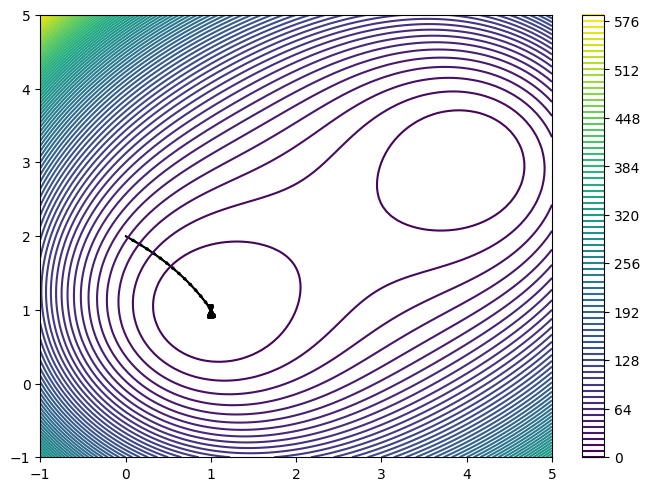

In [10]:
# This is just meant to get you started.  You need to think a bit more about how to make this work well.  

xn = np.array([0., 2.])
stpval = 1e-1
    
fig, ax = plt.subplots(layout='constrained')
cplot = ax.contour(yvals, xvals, fvals, 80)

for jj in range(100):    
    xnp1 = descent_stp(xn, stpval)
    dvals = xnp1 - xn
    ax.arrow(xn[0], xn[1], dvals[0], dvals[1], width = .01)    
    xn = copy(xnp1)
    
cbar = fig.colorbar(cplot)